In [184]:
import random
import subprocess
import timeit
from collections import Callable
from math import log
from statistics import mean

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm

In [157]:
N_RANGE = np.array(range(2, 100))

In [158]:
def johnson(G):
    return nx.johnson(G, weight="weight")

In [159]:
def floyd_warshall(G):
    return nx.floyd_warshall(G, weight="weight")

In [160]:
def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False

In [161]:
def complexity_analysis(measured_function: Callable, data_generate_function: Callable, n_range, measurements_max=5):
    mean_execution_time = []
    for i in tqdm(n_range):
        execution_time = []
        for j in range(0, measurements_max):
            data = data_generate_function(i)
            start = timeit.default_timer()
            measured_function(data)
            end = timeit.default_timer()
            execution_time.append(end - start)
        mean_execution_time.append(mean(execution_time))
    return mean_execution_time

In [162]:
def space_complexity_analysis(python_script_path, n_range, measurements_max=3):
    mean_mem = []
    for i in tqdm(n_range):
        mems = []
        for j in range(0, measurements_max):
            result = subprocess.check_output(f"python {python_script_path} {i}".split()).decode().split("\n")[5:-3]
            mem_splits = list(map(lambda x: float(x.split()[1]) if is_float(x.split()[1]) else 0, result))
            mems.append(max(mem_splits))
        mean_mem.append(mean(mems))
    return mean_mem

In [163]:
def O_n_2_function(data, k):
    return [k * i ** 2 for i in range(1, len(data) + 1)]

In [181]:
O_n_2_function(range(1, 10), 1)

[4, 9, 16, 25, 36, 49, 64, 81, 100]

In [164]:
def johnson_time_complexity_function(data, k):
    return [k * i ** 2 * log(i) + k * (i * (i * (i - 1)) // 2) for i in range(1, len(data) + 1)]

In [165]:
def O_n_3_function(data, k):
    return [k * i ** 3 for i in range(1, len(data) + 1)]

In [166]:
def generate_graph(n):
    m = (n * (n - 1)) // 2
    weight_range = (3, 10)
    matrix = np.zeros((n, n), dtype=int)
    edges = 0
    while edges < m:
        a = random.randint(0, n - 1)
        b = random.randint(0, n - 1)
        if a == b or matrix[a, b] != 0:
            continue
        weight = random.randint(*weight_range)
        matrix[a, b] = weight
        matrix[b, a] = weight
        edges += 1
    G = nx.from_numpy_matrix(matrix)
    return G

In [ ]:
def generate_graph(n):
    m = (n * (n - 1)) // 2
    weight_range = (3, 10)
    matrix = np.zeros((n, n), dtype=int)
    edges = 0
    while edges < m:
        a = random.randint(0, n - 1)
        b = random.randint(0, n - 1)
        if a == b or matrix[a, b] != 0:
            continue
        weight = random.randint(*weight_range)
        matrix[a, b] = weight
        matrix[b, a] = weight
        edges += 1
    G = nx.from_numpy_matrix(matrix)
    return G

In [177]:
johnson_execution_function_time = complexity_analysis(johnson, generate_graph, N_RANGE)

100%|██████████| 98/98 [01:14<00:00,  1.32it/s] 


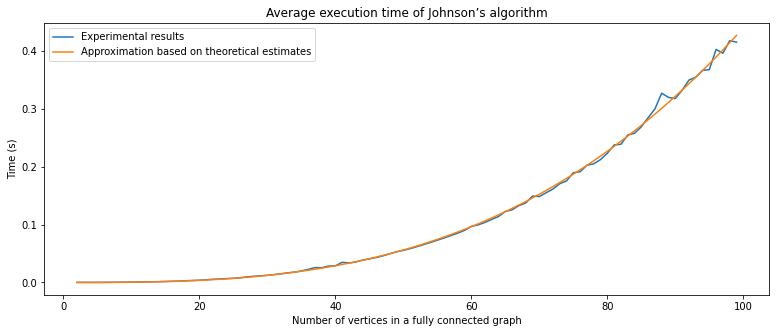

In [178]:
popt, _ = curve_fit(johnson_time_complexity_function, N_RANGE, johnson_execution_function_time)
theoretical_execution_time = johnson_time_complexity_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, johnson_execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of Johnson’s algorithm')
plt.xlabel('Number of vertices in a fully connected graph')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [179]:
johnson_execution_function_space = space_complexity_analysis("johnson.py", N_RANGE, 2)

100%|██████████| 98/98 [05:16<00:00,  3.23s/it]


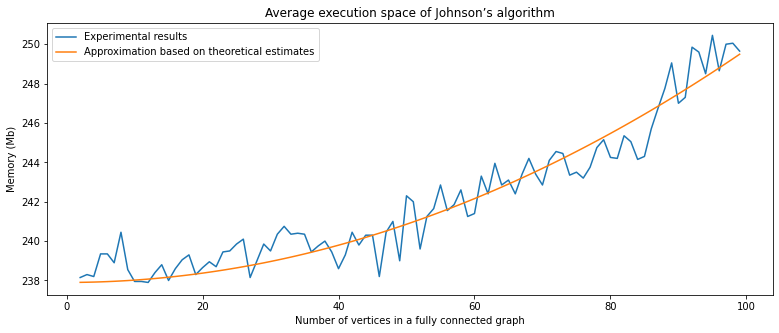

In [180]:
popt, _ = curve_fit(O_n_2_function, N_RANGE,
                    np.array(johnson_execution_function_space) - min(johnson_execution_function_space))
theoretical_execution_space = O_n_2_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, johnson_execution_function_space, label="Experimental results")
plt.plot(N_RANGE, np.array(theoretical_execution_space) + min(johnson_execution_function_space),
         label="Approximation based on theoretical estimates")
plt.title('Average execution space of Johnson’s algorithm')
plt.xlabel('Number of vertices in a fully connected graph')
plt.ylabel('Memory (Mb)')
plt.legend()
plt.show()

In [167]:
floyd_warshall_execution_function_time = complexity_analysis(floyd_warshall, generate_graph, N_RANGE)

100%|██████████| 98/98 [00:32<00:00,  3.00it/s] 


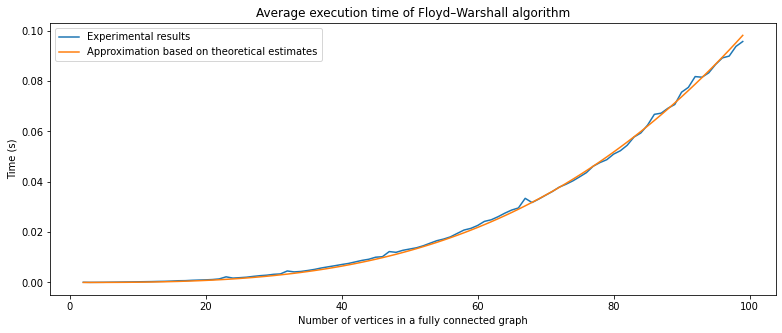

In [169]:
popt, _ = curve_fit(O_n_3_function, N_RANGE, floyd_warshall_execution_function_time)
theoretical_execution_time = O_n_3_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, floyd_warshall_execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of Floyd–Warshall algorithm')
plt.xlabel('Number of vertices in a fully connected graph')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [173]:
floyd_warshall_execution_function_space = space_complexity_analysis("floyd_warshall.py", N_RANGE, 2)

100%|██████████| 98/98 [13:13<00:00,  8.09s/it]


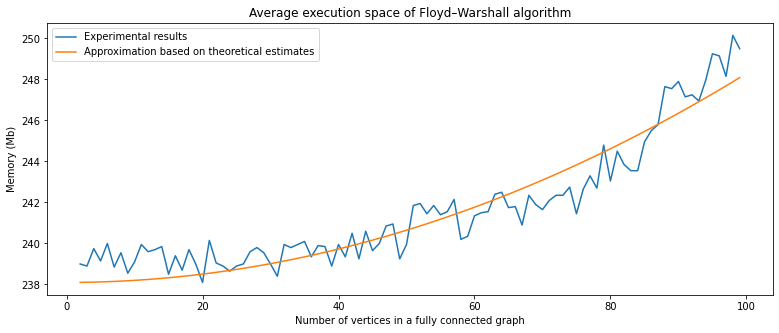

In [176]:
popt, _ = curve_fit(O_n_2_function, N_RANGE,
                    np.array(floyd_warshall_execution_function_space) - min(floyd_warshall_execution_function_space))
theoretical_execution_space = O_n_2_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, floyd_warshall_execution_function_space, label="Experimental results")
plt.plot(N_RANGE, np.array(theoretical_execution_space) + min(floyd_warshall_execution_function_space),
         label="Approximation based on theoretical estimates")
plt.title('Average execution space of Floyd–Warshall algorithm')
plt.xlabel('Number of vertices in a fully connected graph')
plt.ylabel('Memory (Mb)')
plt.legend()
plt.show()